# Bayesian statistics: using least-squares and MCMC

This Python notebook shows:

1) How to create mock data 
2) How to use error bars
3) How to do a curve fit (using least-squares) 
4) How to do a Markov Chain Monte Carlo 

In [1]:
# Calling all the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [2]:
# Steps:
# 1) Define what a random uniform distribution does
# 2) Define what a random.normal function does
# 3) How we generate the data in x (randomised)
# 4) How we generate Gaussian errors (and why) [what happens if errors are not Gaussian?]

# [numpy] random.uniform( ) function

We use this function to create a sample of values to generate mock data. 
Values drawn by the random.uniform() function have the same probability 
of falling in the interval [a,b).

The probability density distribution of the uniform distribution is:

$p(x) = \frac{1}{b-a}$

More info here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html

In [3]:
# Does it mean that if I want a distribution on x values between [0,1) I'll get all numbers between 0 and 0.999?

x_t = np.random.uniform(0,1,10)
x_t

array([0.28380711, 0.1556665 , 0.79993661, 0.28081282, 0.22553307,
       0.86215971, 0.12359739, 0.33765984, 0.15107864, 0.23872746])

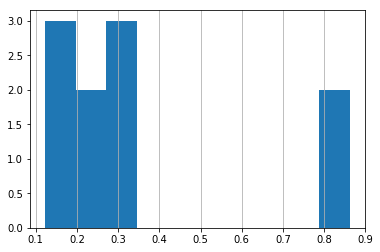

In [4]:
plt.hist(x_t, bins = 10)
plt.grid(b = True, axis = 'x', which = 'major')
# In this histogram we see, for instance, 
#the number of values drawn by the function that fall in certain bin between [0,1)

# [numpy] random.normal( ) function

We are going to use the random.normal( ) function to generate Gaussian noise in the values given by the "uniform distribution". We also are going to use this function to generate random values for the error bars of our mock data.

In this case, values are drawn from a normal (Gaussian) distribution. The function asks the user for a "mean" value (denoted as loc, and referring to the centre of the distribution) and also for a value for the standard deviation (denoted as scale, which indicates the width of the disribution). 

The probability density for the Gaussian distribution is:

$p(x) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \Biggr ( -\frac{(x-\mu)^2}{2\sigma^2} \Biggr)$ 

The numpy.random.normal is more likely to return samples lying close to the mean, rather than those far away.

See more info here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html

In [5]:
# If I do a random.normal(0,1) do a get a Gaussian centred in 0 and with a width of 2? Yes. See the histogram below.

x_rn_t = np.random.normal(0,1,1000)
#x_rn_t
# The third value is the size of the array. In this case the output is an array of 1000 numbers

Text(0.5,1,'Values centred in 0 with standard deviation of 1')

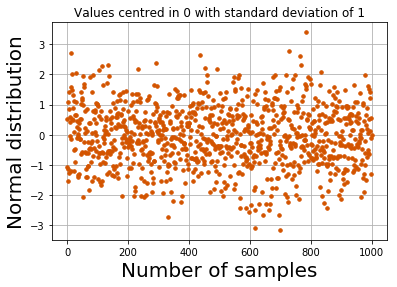

In [6]:
# 
plt.plot(x_rn_t, marker = 'o', markersize = 3.5, color = '#d35400', linestyle = 'None')
plt.grid()
plt.xlabel('Number of samples', size = 20)
plt.ylabel("Normal distribution", size = 20)
plt.title("Values centred in 0 with standard deviation of 1")

(array([  2.,   6.,  12.,  31.,  36.,  62.,  95., 122., 136., 118., 127.,
         97.,  67.,  52.,  22.,   9.,   3.,   2.,   1.]),
 array([-3.1557457 , -2.81081002, -2.46587434, -2.12093866, -1.77600298,
        -1.4310673 , -1.08613162, -0.74119594, -0.39626027, -0.05132459,
         0.29361109,  0.63854677,  0.98348245,  1.32841813,  1.67335381,
         2.01828949,  2.36322516,  2.70816084,  3.05309652,  3.3980322 ]),
 <a list of 19 Patch objects>)

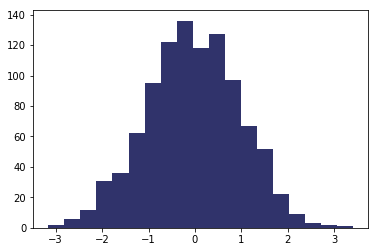

In [7]:
plt.hist(x_rn_t, bins = 19, color = '#30336b')

# Generating mock data

Text(0,0.5,'measurements [y fake]')

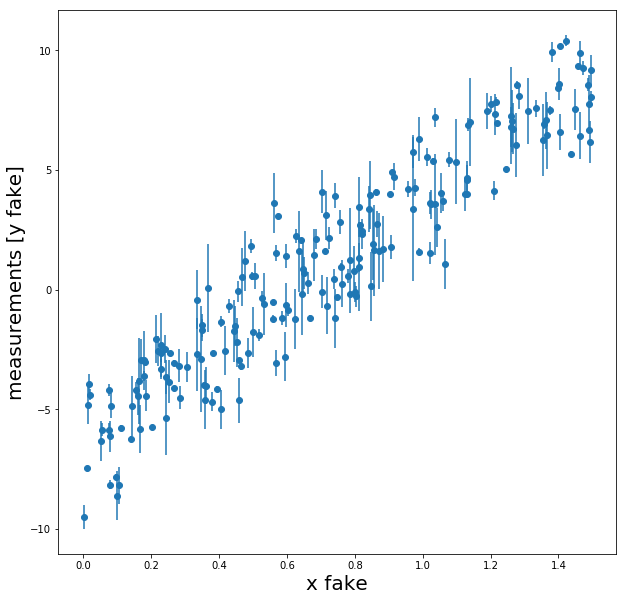

In [8]:

##### First ##### Use the random.uniform() function to generate x values in the for of: y = m*x + b
npoint = 200 #Number of points we want to generate
x_fake = np.random.uniform(0.0, 1.5, npoint) 
##### Second ##### Generate the line y_fake = m_fake*x_fake + b_fake
m_fake = 10
b_fake = -6
y_fake = m_fake* x_fake +b_fake
##### Third ##### Add noise: use the random.gaussian() to add some (Gaussian) noise to the x_fake
gaussian_noise = np.random.normal(0.0, 1.5, npoint) 
y_fake = y_fake + gaussian_noise
##### Fourth #### Error bars: create random values using the random.normal() distribution
error_bars_fake =np.abs(np.random.normal(0,1.0, npoint))
##### Fifth ##### Plot it
figuresize= plt.figure(figsize=(10,10))
plt.errorbar(x_fake,y_fake, yerr = error_bars_fake, linestyle = "None", marker = "o")
plt.xlabel('x fake', size =20)
plt.ylabel('measurements [y fake]', size =20)
#Uncomment the line below to see the points without the error bars
#plt.plot(x_fake,y_fake, linestyle = "None", marker = "o")
#plt.savefig('mock_data.pdf')

# Least-square fit using scifi optimise

1) Print the mock data in a datafile
2) Fit it with least-squares


In [9]:
# Define a function 
#def func(x, a, b, c):
#    return a + b*x + c*x*x

In [10]:
# Define a function 
def func(x, m, b):
    return m*x + b

In [11]:
x0   = np.array([0.0, 0.0])


In [12]:
our_fit = curve_fit(func,x_fake , y_fake, x0, error_bars_fake)

In [13]:
print(our_fit)

(array([12.50731588, -7.39072551]), array([[ 0.00626289, -0.00876729],
       [-0.00876729,  0.01231075]]))


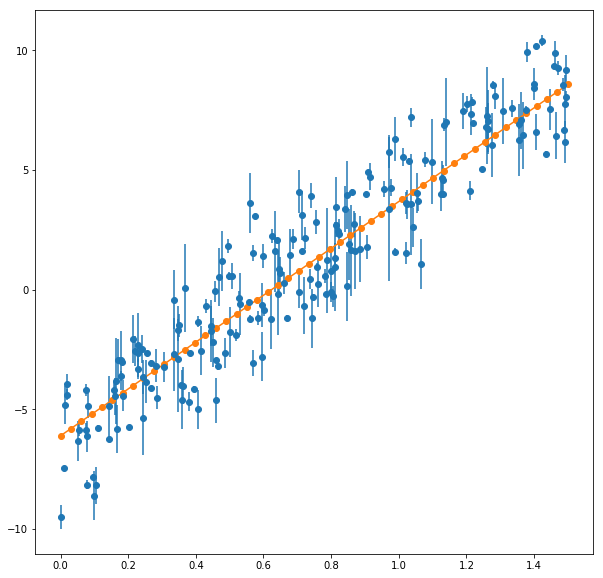

In [14]:
plt.figure(figsize=(10,10))
plt.errorbar(x_fake,y_fake, yerr = error_bars_fake, linestyle = "None", marker = "o")
x_fit = np.linspace(0,1.5)
y =func(x_fit, 9.79, -6.11)
plt. plot(x_fit, y, marker = 'o' )

In [15]:
print(x_fit)

[0.         0.03061224 0.06122449 0.09183673 0.12244898 0.15306122
 0.18367347 0.21428571 0.24489796 0.2755102  0.30612245 0.33673469
 0.36734694 0.39795918 0.42857143 0.45918367 0.48979592 0.52040816
 0.55102041 0.58163265 0.6122449  0.64285714 0.67346939 0.70408163
 0.73469388 0.76530612 0.79591837 0.82653061 0.85714286 0.8877551
 0.91836735 0.94897959 0.97959184 1.01020408 1.04081633 1.07142857
 1.10204082 1.13265306 1.16326531 1.19387755 1.2244898  1.25510204
 1.28571429 1.31632653 1.34693878 1.37755102 1.40816327 1.43877551
 1.46938776 1.5       ]


# Reading data text file for SNe

In [16]:
import pandas as pd
SNe_file_data = pd.read_csv("SN_0_pandas.txt", delimiter = "\t", header = 'infer')
#SNe_file_data

Text(0,0.5,'$\\mu$')

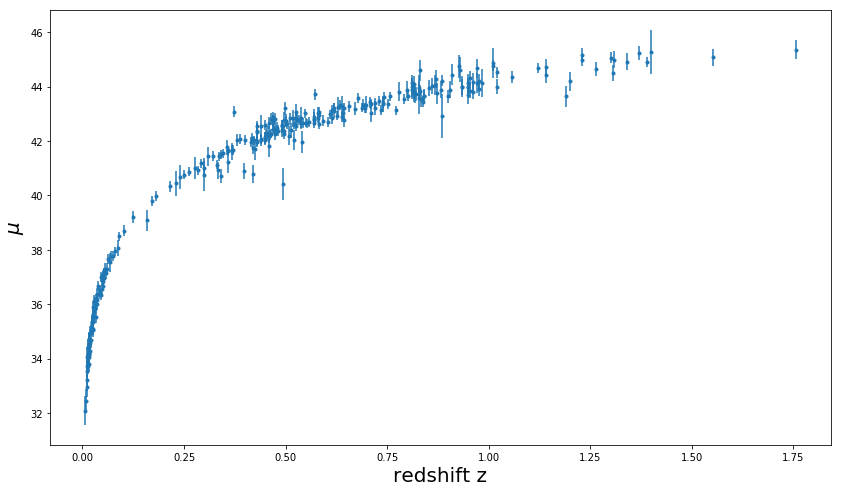

In [17]:
plt.figure(figsize=(14,8))
plt.errorbar(SNe_file_data['  z'], SNe_file_data['  mu'], yerr=SNe_file_data['sigma'], xerr=None, marker = '.' , linestyle = 'None')
plt.xlabel('redshift z', size = 20)
plt.ylabel(r'$\mu$', size = 20)

In [18]:
# Definition of the model we want to fit the data with
def model(x,a,b):
    return a*np.log10(x)+b

In [19]:
def likelihood (x,m,b,data, error):
    L = -0.5* (np.sum(((data - model(x,m,b))/error)**2)) 
    return L

In [20]:
likelihood(SNe_file_data['  z'], 1, 30, SNe_file_data['  mu'], SNe_file_data['sigma'] )

-407544.87648724613

Text(0,0.5,'$\\mu$')

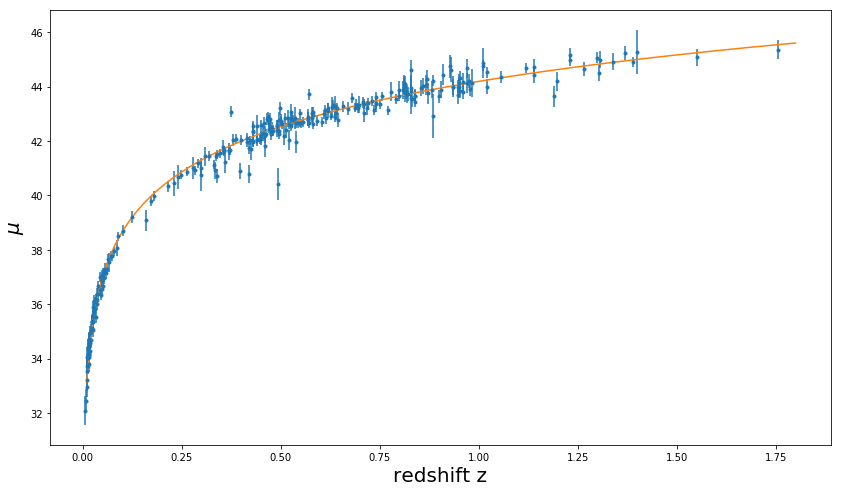

In [21]:
plt.figure(figsize=(14,8))
plt.errorbar(SNe_file_data['  z'], SNe_file_data['  mu'], yerr=SNe_file_data['sigma'], xerr=None, marker = '.' , linestyle = 'None')
x_dummy = np.linspace(0.01,1.8,100)
plt.plot(x_dummy, model(x_dummy,5.52746586,44.18882188))
plt.xlabel('redshift z', size = 20)
plt.ylabel(r'$\mu$', size = 20)

In [22]:
def model(x,a,b):
    return a*np.log10(x)+b
x0 = (20,200)
our_fit = curve_fit(model,SNe_file_data['  z'] , SNe_file_data['  mu'], x0, SNe_file_data['sigma'])
our_fit
#values,covar = curve_fit(model,SNe_file_data['  z'] , SNe_file_data['  mu'], x0, SNe_file_data['sigma'])

(array([ 5.52746586, 44.18882188]), array([[0.00072467, 0.00041489],
        [0.00041489, 0.00047607]]))

## Uncertainties in the fit

In [23]:
nume = 10000
x_fit = x_dummy
mc_errors = np.zeros((nume,x_fit.size))

for i in np.arange(10000):
    a_i = np.random.normal(our_fit[0][0],np.sqrt(our_fit[1][0][0])) 
    b_i = np.random.normal(our_fit[0][1],np.sqrt(our_fit[1][1][1]))
    mc_errors[i] = model(x_fit, a_i,b_i)
              

In [24]:
# This one of the values for one of the parameteres in the model
our_fit[0][0]

5.5274658590914605

In [25]:
# This is one of the values for one of the parameteres in the model
our_fit[0][1]

44.188821877538835

In [26]:
# First value in the covariance Matrix given by the function curv_fit
our_fit[1][0][0]

0.0007246740887217004

In [27]:
# Second value in the covariance Matrix given by the function curve_fit
our_fit[1][1][1]

0.0004760678810327864

Text(0,0.5,'$\\mu$')

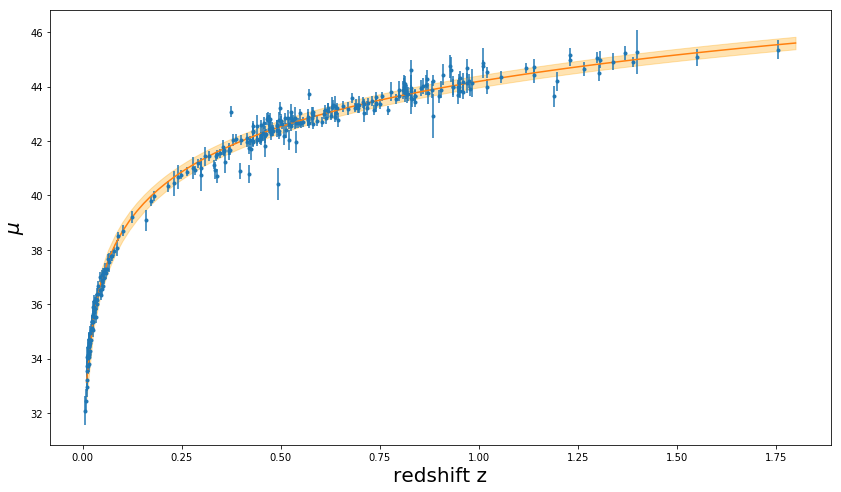

In [28]:
plt.figure(figsize=(14,8))
plt.errorbar(SNe_file_data['  z'], SNe_file_data['  mu'], yerr=SNe_file_data['sigma'], xerr=None, marker = '.' , linestyle = 'None')
#x_dummy = np.linspace(0.01,1.8,100)
plt.plot(x_dummy, model(x_dummy,5.52746586,44.18882188))
plt.fill_between(x_fit,mc_errors.mean(axis=0)-10.0*mc_errors.std(axis=0),
                mc_errors.mean(axis=0)+10.0*mc_errors.std(axis=0),alpha=0.3,color='orange')
plt.xlabel('redshift z', size = 20)
plt.ylabel(r'$\mu$', size = 20)

In [29]:
mc_errors.mean(axis=0)-mc_errors.std(axis=0)

array([33.07587914, 35.56532613, 36.76357069, 37.56021326, 38.15786627,
       38.63630998, 39.0352682 , 39.37741685, 39.67692896, 39.94325724,
       40.18302231, 40.40104204, 40.60093188, 40.78547449, 40.95685733,
       41.11683118, 41.26681915, 41.40799369, 41.54133217, 41.66765794,
       41.78767103, 41.90197164, 42.01107829, 42.11544194, 42.21545728,
       42.31147171, 42.40379261, 42.49269325, 42.57841766, 42.66118467,
       42.74119125, 42.81861532, 42.89361817, 42.96634642, 43.03693378,
       43.1055025 , 43.17216467, 43.2370233 , 43.30017326, 43.36170214,
       43.42169096, 43.48021484, 43.53734352, 43.59314186, 43.64767035,
       43.7009854 , 43.75313978, 43.80418288, 43.854161  , 43.90311761,
       43.95109358, 43.99812738, 44.04425525, 44.08951138, 44.13392807,
       44.17753586, 44.22036365, 44.2624388 , 44.3037873 , 44.34443378,
       44.38440165, 44.42371319, 44.46238956, 44.50045094, 44.53791657,
       44.57480479, 44.61113311, 44.64691824, 44.68217619, 44.71

# Extracting specific lines from a complex-datafile-form

In [30]:
# In this cell you will find the bit of couding to read the output file 

##########################################
# UNCOMMENT BELOW TO EXTRACT THE DATA FROM AN OUTPUT FILE
##########################################

#initial_phrase = "####"
#block_filename = 'TnD_lines.txt'
#output_filename = '/Users/teresita/Documents/cloudy_runs/cloudy_beck2011/sphe_LyA_AbSt3dex_nH_NHI20_HM05_z5/sphe_LyA_AbSt3dex_nH_NHI20_HM05_z5.out'
#def reading_file():
#    with open(block_filename, 'w') as savefile:
#        with open(output_filename, 'r') as f:
#            for line in f.readlines(): 
#                if initial_phrase in line:
#                    print(line)
#                    savefile.write(line)
#reading_file()


##########################################
# UNCOMMENT BELOW TO EXTRACT THE ION INFORMATION FROM
# THE OUTPUT FILE
# IN THIS CASE IS GOING TO BE CARBON
##########################################

#initial_phrase = " Carbon "
#block_filename = 'Carbon_lines.txt'
#output_filename = '/Users/teresita/Documents/cloudy_runs/cloudy_beck2011/sphe_LyA_AbSt3dex_nH_NHI20_HM05_z5/sphe_LyA_AbSt3dex_nH_NHI20_HM05_z5.out'
#def reading_file():
#    with open(block_filename, 'w') as savefile:
#        with open(output_filename, 'r') as f:
#            for line in f.readlines(): 
#                if initial_phrase in line:
#                    print(line)
#                    savefile.write(line)
#reading_file()
#

In [31]:
##########################################
# UNCOMMENT BELOW TO "CLEAN" THE DATA EXTRACTED ABOVE
##########################################

#editing_text_tabs = 'TnD_lines.txt'
#os.system("sed -e 's/ ####  //g' " + editing_text_tabs + " > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )  
#os.system("sed -e 's/ #### //g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/ ####//g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/  /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/ /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new")
#os.system("sed -e 's/Te:/Te:\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/Hden:/Hden:\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/R-R0:/R-R0:\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/dR:/dR:\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("scp temp_meta.txt " + editing_text_tabs)
#os.system("rm temp_meta.txt")
#os.system("rm temp_meta.new")

##########################################
# UNCOMMENT BELOW TO "CLEAN" THE DATA EXTRACTED ABOVE
##########################################

#editing_text_tabs = 'Carbon_lines.txt'
#os.system("sed -e 's/ Carbon   /Carbon/g' Carbon_lines.txt > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" ) 
#os.system("sed -e 's/          /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/        /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/       /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/     /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/   /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/  /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt temp_meta.new" )
#os.system("sed -e 's/ /\t/g' temp_meta.new > temp_meta.txt")
#os.system("scp temp_meta.txt Carbon_lines.txt")
#os.system("rm temp_meta.txt")
#os.system("rm temp_meta.new")

Text(0,0.5,'Density [cm$^{-2}$]')

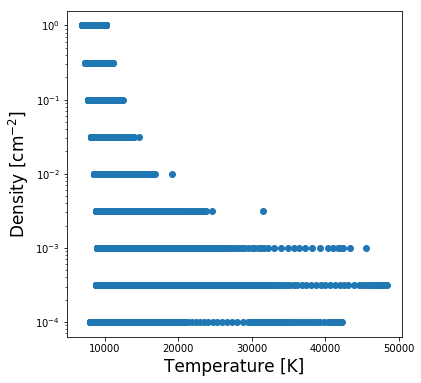

In [32]:
plt.figure(figsize=(6,6))
TandD_lines = pd.read_csv('TnD_lines.txt', header = None, delimiter = '\t')
Temperature, Density = TandD_lines[2], TandD_lines[4]
plt.plot(Temperature, Density, marker = 'o', linestyle = 'None')
plt.yscale('log')
plt.xlabel('Temperature [K]', size = 17)
plt.ylabel('Density [cm$^{-2}$]', size = 17)

In [33]:
Carbon= pd.read_csv('Carbon_lines.txt', header = None, delimiter = '\t', comment = '#')
CIV = Carbon[4]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5,1,'Ionization of CIV')

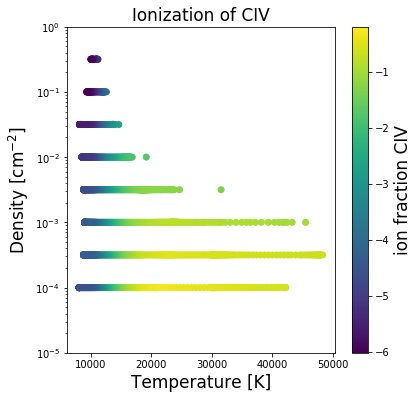

In [63]:
plt.figure(figsize=(6,6))
ion = np.log10(Carbon[4])
psm = plt.scatter(Temperature, Density, marker = 'o', linestyle = 'None', c = ion )
cb2 = plt.colorbar(psm)
cb2.ax.tick_params(labelsize=10) 
cb2.ax.set_ylabel(r'ion fraction CIV',fontsize=17)
plt.yscale('log')
plt.ylim(1e-5,1)
plt.xlabel('Temperature [K]', size = 17)
plt.ylabel('Density [cm$^{-2}$]', size = 17)
plt.title("Ionization of CIV", size = 17)

Text(0.5,1,'H Density: Hden')

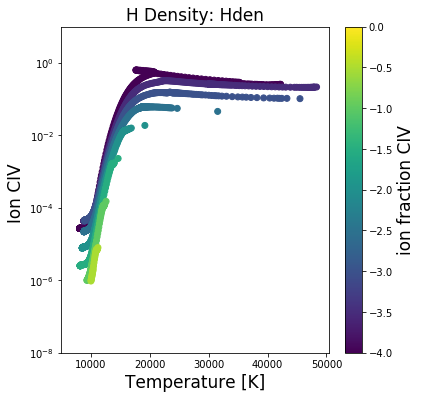

In [62]:
plt.figure(figsize=(6,6))
dens_mapcolor = np.log10(Density)
psm = plt.scatter(Temperature, CIV, marker = 'o', linestyle = 'None', c = dens_mapcolor )
cb2 = plt.colorbar(psm)
cb2.ax.tick_params(labelsize=10) 
cb2.ax.set_ylabel(r'ion fraction CIV',fontsize=17)
plt.yscale('log')
plt.ylim(1e-8,10)
plt.xlabel('Temperature [K]', size = 17)
plt.ylabel('Ion CIV ', size = 17)
plt.title("H Density: Hden", size = 17)

Text(0.5,1,'Hydrogen density: Hden')

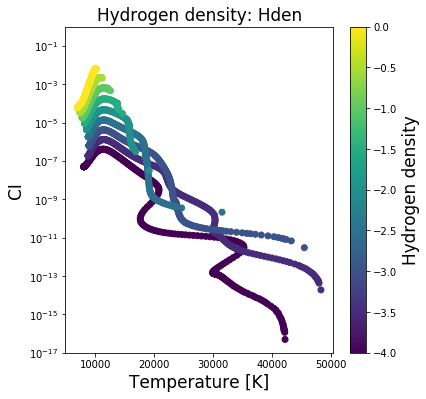

In [64]:
plt.figure(figsize=(6,6))
CI = Carbon[1]
dens_mapcolor = np.log10(Density)
psm = plt.scatter(Temperature, CI, marker = 'o', linestyle = 'None', c = dens_mapcolor )
cb2 = plt.colorbar(psm)
cb2.ax.tick_params(labelsize=10) 
cb2.ax.set_ylabel(r'Hydrogen density',fontsize=17)

plt.yscale('log')
plt.ylim(1e-17,1)
plt.xlabel('Temperature [K]', size = 17)
plt.ylabel('CI', size = 17)
plt.title("Hydrogen density: Hden", size = 17)

Text(0.5,1,'Hydrogen density: Hden')

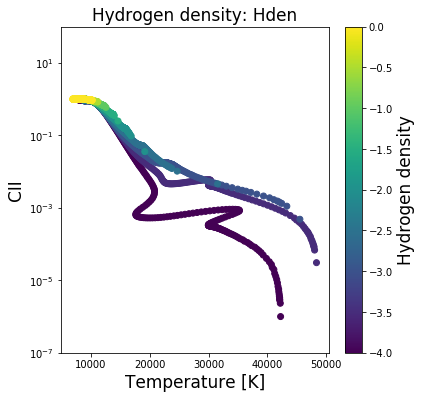

In [65]:
plt.figure(figsize=(6,6))
CII = Carbon[2]
dens_mapcolor = np.log10(Density)
psm = plt.scatter(Temperature, CII, marker = 'o', linestyle = 'None', c = dens_mapcolor )
cb2 = plt.colorbar(psm)
cb2.ax.tick_params(labelsize=10) 
cb2.ax.set_ylabel(r'Hydrogen density',fontsize=17)

plt.yscale('log')
plt.ylim(1e-7,100)
plt.xlabel('Temperature [K]', size = 17)
plt.ylabel('CII', size = 17)
plt.title("Hydrogen density: Hden", size = 17)